In [3]:
#%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import scipy as sp
import scipy.io as sp_io
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
import seaborn as sns
from matplotlib.colors import ListedColormap
colours=sns.color_palette('colorblind', 10)
my_cmap = ListedColormap(colours)


## The ESM4 data

In [6]:
predHist=np.load('/home/maike/Documents/NN_dynamicsPrediction/ESM4/esm4_historical1990to2009.npz')
pred1pctCO2=np.load('/home/maike/Documents/NN_dynamicsPrediction/ESM4/ESM-1pctCO2-000101-014012.npy')
pred4abruptCO2=np.load('/home/maike/Documents/NN_dynamicsPrediction/ESM4/ESM-abrupt4xCO2-000101-014012.npy')
lat=predHist['lat']
lon=predHist['lon']

Hfile=np.load('/home/maike/Documents/NN_dynamicsPrediction/ESM4/esm4_historical1990to2009.npz')
H=Hfile['depth']

In [7]:
esm1pct=np.load('/home/maike/Documents/NN_dynamicsPrediction/ESM4/ESM4-1pctCO2-000101-014012-EnsembleMLP.npy')
esmHist=np.load('/home/maike/Documents/NN_dynamicsPrediction/ESM4/ESM4-Historical-199001-200912-EnsembleMLP.npy')
esm4=np.load('/home/maike/Documents/NN_dynamicsPrediction/ESM4/ESM4-abrupt4xCO2-000101-014012-EnsembleMLP.npy')



In [8]:

def makeFig(data, cMin, cMax, cStep, title, ColMap, saveName):
    plt.figure(figsize=(20,12))
    #lons = lon[:,1]
    #lats = lat[1,:]
    #llons, llats = np.roll(lon,100,axis=1),lat
    fig = plt.figure()
    ax = fig.add_axes([0.05,0.05,0.9,0.9])
    m = Basemap(projection='kav7',lon_0=-60,resolution='l')
    im1 = m.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=ColMap,latlon=True, extend='both')
    m.drawmapboundary(fill_color='0.9')
    m.drawparallels(np.arange(-90.,99.,30.),labels=[1,1,0,1])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[1,1,0,1])
    m.drawcoastlines()
    m.fillcontinents()
    ax.set_title(title)
    cb = m.colorbar(im1,"right", size="5%", pad="9%")
    cb.set_ticks([-0.5,0.5, 1.5, 2.5, 3.5, 4.5])
    cb.set_ticklabels(["MD", "S-SV", "N-Sv", "TR", "SO", "NL"])
    #plt.savefig(saveName, format='png', dpi=500, bbox_inches='tight')
    
def makeFigZoomBathymetry(data,cMin, cMax, cStep, title, saveName, label, labelSpot, llcrnrlon=-65, urcrnrlon=-20, llcrnrlat=35, urcrnrlat=65):
    fig = plt.figure(figsize=(8,8))
    map2 = Basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat, lon_0=-90, projection='merc', resolution='l')
    map2.drawmapboundary(fill_color='0.9')
    map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
    map2.drawcoastlines()
    map2.fillcontinents()
    map2.drawcountries()
    map2.drawparallels(np.arange(-90.,99.,5.),labels=[1,1,0,1], fontsize=15)
    map2.drawmeridians(np.arange(-180.,180.,20.),labels=[1,1,0,1], fontsize=15)
    im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)
   
    plt.title(title, fontsize=20)
    display(plt.gca().get_ylim())
    #cb = map2.colorbar(im2,"right", size="5%", pad="9%")
    cb = map2.colorbar(im2,"right", size="5%", pad="12%")
    cb.ax.tick_params(labelsize=20) 
    cb.set_ticks([-0.5,0.5, 1.5, 2.5, 3.5, 4.5])
    cb.set_ticklabels(["MD", "S-SV", "N-SV", "TR", "SO", "NL"]) 
    
    im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
    #plt.clabel(im2,fontsize=14,fmt='%1.1f', inline=1)
    yL=plt.gca().get_ylim()
    xL=plt.gca().get_xlim()
    plt.text(xL[1]*0.01, yL[1]*0.1, label, fontsize=50, size=40, weight='bold', bbox={'facecolor':'white', 'alpha':0.7})
    plt.text(xL[1]*0.02, yL[1]*0.9, labelSpot, fontsize=50, size=40, weight='bold', bbox={'facecolor':'white', 'alpha':0.7})

    plt.savefig(saveName, format='png', dpi=100, bbox_inches='tight')


/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'shading'


(0.0, 9938687.360683784)

/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'linethickness'


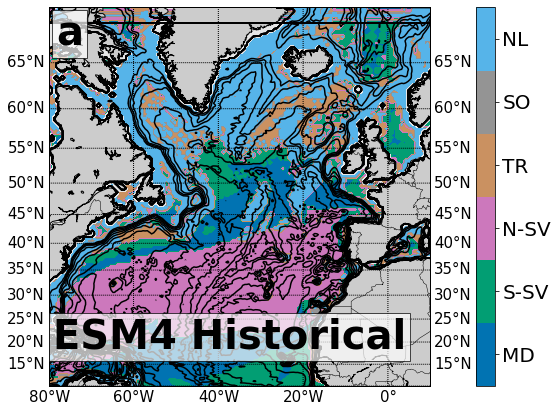

In [8]:
makeFigZoomBathymetry(esmHist[0], -1,6,1,'', 'ESM_pred_historical_NAtl_EnsembleMLP_prez.png', r'ESM4 Historical', 'a', llcrnrlon=-80, urcrnrlon=10, llcrnrlat=10, urcrnrlat=70)

In [9]:
natVar1pct=np.zeros(esmHist[0].shape)*np.nan
for n in np.arange(0,8):
    natVar1pct[np.count_nonzero(esm1pct[4:7] == n, axis = 0)>2]=n
    
natVar4=np.zeros(esmHist[0].shape)*np.nan
for n in np.arange(0,8):
    natVar4[np.count_nonzero(esm4[3:7] == n, axis = 0)>2]=n

/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'shading'


(0.0, 9938687.360683784)

/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'shading'


(0.0, 9938687.360683784)

/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'linethickness'


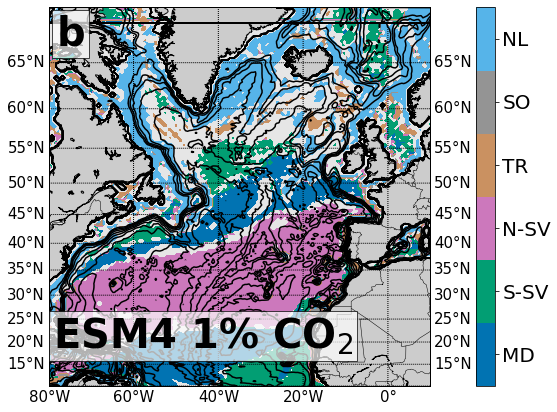

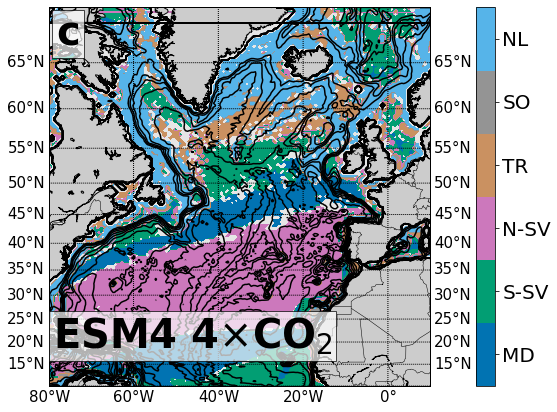

In [10]:
makeFigZoomBathymetry(natVar1pct, -1,6,1,'', 'ESM_pred_historical_NAtl_noNatVar_EnsembleMLP_prez.png', r'ESM4 1% CO$_2$', 'b', llcrnrlon=-80, urcrnrlon=10, llcrnrlat=10, urcrnrlat=70)

makeFigZoomBathymetry(natVar4, -1,6,1,'', 'ESM_pred_abrupt4xO2_NAtl_noNatVar_EnsembleMLP_prez.png', r'ESM4 4$\times$CO$_2$', 'c', llcrnrlon=-80, urcrnrlon=10, llcrnrlat=10, urcrnrlat=70)